In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers,Sequential  
import matplotlib.pyplot as plt
import numpy as np
image_dim  = 256
batch_dim= 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "tea sickness dataset",
    shuffle =True,
    seed = 123,
    image_size = ( image_dim, image_dim ),
    batch_size = batch_dim
    
)

Found 885 files belonging to 8 classes.


In [4]:
class_name = dataset.class_names
class_name

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [5]:
batch_count = len( dataset)
def train_test_split(dataset , train_s = 0.75 , validation_s =0.15, test_s = 0.1, shuffle = True , Shuffle_size = 10000, seed = 123 ):
    assert( train_s + validation_s + test_s) == 1
    if shuffle:
     dataset = dataset.shuffle( Shuffle_size , seed )   
     train_length = int(train_s* batch_count)
     validation_length = int(validation_s* batch_count)
     test_length = int(test_s*batch_count)
     
     train_ds = dataset.take(train_length)
     remaining_ds = dataset.skip(train_length)
     validation_ds = remaining_ds.take(validation_length)
     test_ds = remaining_ds.skip(validation_length)
     
     return train_ds, validation_ds, test_ds
 




In [6]:
train_ds , validation_ds , test_ds = train_test_split( dataset)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
resize_image=tf.keras.Sequential ([
 layers.Resizing(image_dim,image_dim ),
    layers.Rescaling(1.0/255),
       
    
])
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [35]:


train_d = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [95]:


colour = 3
input_shape = (batch_count, image_dim, image_dim, colour)

model = models.Sequential([
    data_augmentation,  # Your augmentation layer
    resize_image,  # Your resize image layer
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model.build(input_shape = input_shape )
model.summary()


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (28, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_15 (Sequential)      │ (28, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_152 (Conv2D)             │ (28, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_152               │ (28, 127, 127, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_153 (Conv2D)             │ (28, 125, 125, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_153               │ (28, 62, 62, 32)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_154 (Conv2D)             │ (28, 60, 60, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_154               │ (28, 30, 30, 32)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_155 (Conv2D)             │ (28, 28, 28, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_155               │ (28, 14, 14, 32)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_156 (Conv2D)             │ (28, 12, 12, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_156               │ (28, 6, 6, 64)         │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_157 (Conv2D)             │ (28, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_157               │ (28, 2, 2, 64)         │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (28, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (28, 32)               │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (28, 8)                │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,552 (361.53 KB)

 Trainable params: 92,552 (361.53 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [116]:
training_history = model.fit(
    train_ds,
    epochs=150,
    batch_size=batch_count,
    verbose=1,
    validation_data=validation_ds,
    
)

Epoch 1/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8548 - loss: 0.3255 - val_accuracy: 0.8376 - val_loss: 0.3404
Epoch 2/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.8725 - loss: 0.3341 - val_accuracy: 0.8547 - val_loss: 0.3931
Epoch 3/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.8389 - loss: 0.3746 - val_accuracy: 0.8632 - val_loss: 0.3650
Epoch 4/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - accuracy: 0.8727 - loss: 0.3030 - val_accuracy: 0.8632 - val_loss: 0.3664
Epoch 5/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 419ms/step - accuracy: 0.8903 - loss: 0.3051 - val_accuracy: 0.8291 - val_loss: 0.3805
Epoch 6/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 424ms/step - accuracy: 0.8530 - loss: 0.3403 - val_accuracy: 0.8974 - val_loss: 0.3011
Epoch 7/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.8933 - loss: 0.2879 - val_accuracy: 0.8718 - val_loss: 0.3579
Epoch 8/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.8704 - loss: 0.3221 - val_accu

In [124]:
score = model.evaluate(test_ds) 

score 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9141 - loss: 0.2614


[0.31101104617118835, 0.90625]

predicting image 
name of the disease  white spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction: white spot


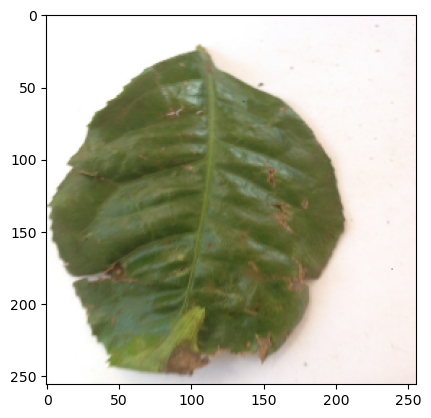

In [121]:
for image_batch , label_batch in dataset.take(2):
    first = image_batch[0].numpy().astype('uint8')
    firstlabel = label_batch[0].numpy()
    
print( "predicting image ")
plt.imshow(first)
print( "name of the disease " , class_name[firstlabel] )



# Make predictions on the batch of images
predictions = model.predict(image_batch)

# Get the predicted class index for the first image in the batch
predicted_class_index = np.argmax(predictions[0])

# Map the predicted class index to the corresponding class name
predicted_class_name = class_name[predicted_class_index]

# Print the predicted class name
print("Prediction:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


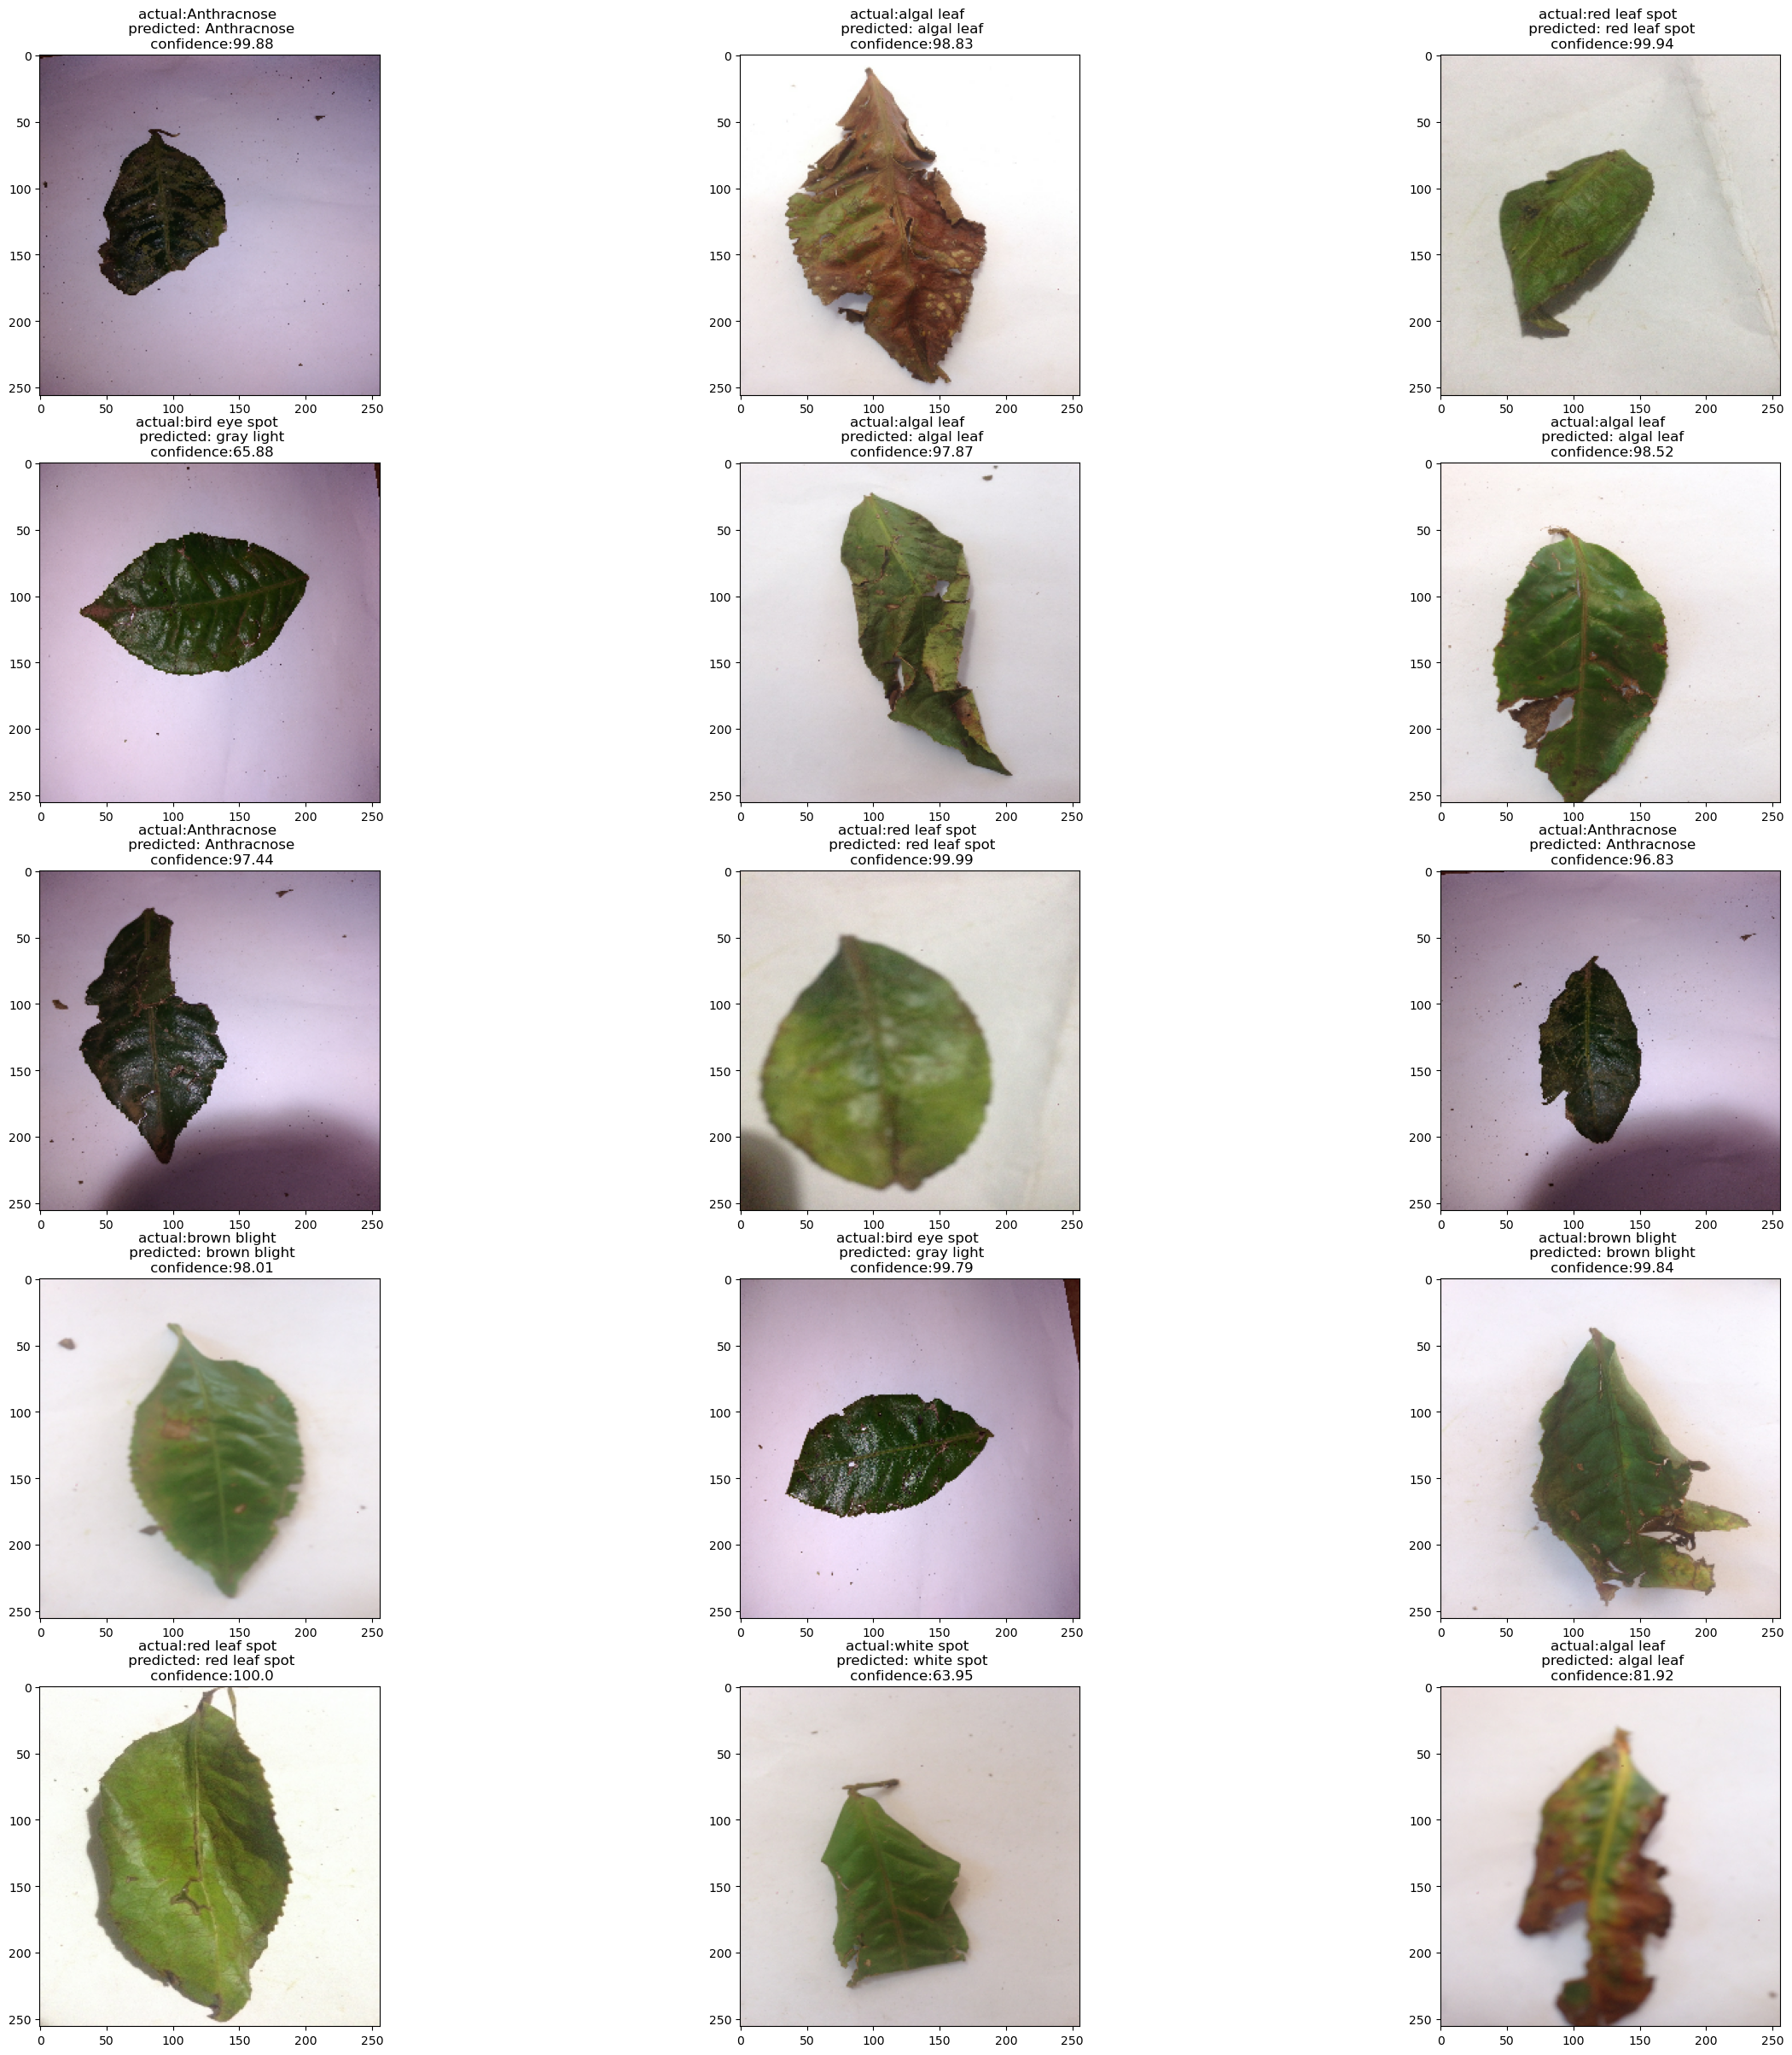

In [123]:
def prediction_function(model,img ):
    array_of_image = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    array_of_image = tf.expand_dims(array_of_image, 0)
    
    predict = model.predict(array_of_image)
    
    predicted_class_index = np.argmax(predict[0])
    predicted_class = class_name[predicted_class_index]
    confidence = round(100 * (np.max(predict[0])),2)
    return predicted_class, confidence








plt.figure(figsize=(30, 30))
for image, label in test_ds.take(1):
    for i in range(15):  # Adjusted to 15 to match subplot layout
        plt.subplot(5, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        
        predicted_class, confidence = prediction_function(model,image[i])
        original_class_name = class_name[label[i]]
        
        plt.title(f"actual:{original_class_name} \n predicted: {predicted_class}\n confidence:{confidence}")


plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('C:/Users/Arnav Singh/OneDrive/Desktop/tea leaf//new_model[2].keras')